In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

#### We assume that the robustness measures are stored in a dictionary D. Feature names are the keys of D and map to a dictionary mapping robustness names to their computed values.

In [2]:
import json
json_path = "../data/20180531-143635/robustness_measures/computations.json"
with open(json_path) as f:
    feature_dic = json.load(f)

In [3]:
print("Number of features {}".format(len(feature_dic)))

Number of features 92


In [4]:
feature_names = list(feature_dic.keys())
feature_names

['brain_firstorder_10Percentile',
 'brain_firstorder_90Percentile',
 'brain_firstorder_Energy',
 'brain_firstorder_Entropy',
 'brain_firstorder_InterquartileRange',
 'brain_firstorder_Kurtosis',
 'brain_firstorder_Maximum',
 'brain_firstorder_MeanAbsoluteDeviation',
 'brain_firstorder_Mean',
 'brain_firstorder_Median',
 'brain_firstorder_Minimum',
 'brain_firstorder_Range',
 'brain_firstorder_RobustMeanAbsoluteDeviation',
 'brain_firstorder_RootMeanSquared',
 'brain_firstorder_Skewness',
 'brain_firstorder_TotalEnergy',
 'brain_firstorder_Uniformity',
 'brain_firstorder_Variance',
 'brain_glcm_Autocorrelation',
 'brain_glcm_ClusterProminence',
 'brain_glcm_ClusterShade',
 'brain_glcm_ClusterTendency',
 'brain_glcm_Contrast',
 'brain_glcm_Correlation',
 'brain_glcm_DifferenceAverage',
 'brain_glcm_DifferenceEntropy',
 'brain_glcm_DifferenceVariance',
 'brain_glcm_Id',
 'brain_glcm_Idm',
 'brain_glcm_Idmn',
 'brain_glcm_Idn',
 'brain_glcm_Imc1',
 'brain_glcm_Imc2',
 'brain_glcm_InverseVa

In [5]:
some_feature = feature_names[0]
print("Number of samples {}".format(feature_dic[some_feature]["n_samples"]))

Number of samples 12478


In [6]:
robustness_names = list(feature_dic[some_feature].keys())
robustness_names.remove('n_samples')
robustness_names

['ICC_C1', 'ICC_A1', 'pearsonr', 'linccc']

## Sort by robustness value

In [7]:
def sort_by_value(f_dic, robustness_name):
    # Collect values
    pairs = []
    for f_name in f_dic:
        pairs.append((f_name, f_dic[f_name][robustness_name]))

    # Sort by second value (robustness)
    pairs = sorted(pairs, key=lambda x: -x[1])
    return pairs

In [17]:
for r_name in robustness_names:
    s = sort_by_value(feature_dic, r_name)
    print("--- {} ---".format(r_name))
    print("feature_name,feature_value")
    for t in s[:15]:
        print("{},{}".format(t[0], t[1]))

--- ICC_C1 ---
feature_name,feature_value
brain_firstorder_10Percentile,1
brain_firstorder_Median,1
brain_glszm_ZonePercentage,0.9469791933557149
brain_gldm_SmallDependenceEmphasis,0.9449838017488063
brain_glrlm_RunLengthNonUniformity,0.9421373129861106
brain_glcm_Id,0.9393424805136257
brain_glcm_Idm,0.9390374656901352
brain_glcm_DifferenceEntropy,0.9386998635664283
brain_glrlm_RunEntropy,0.9385746054679227
brain_glcm_Imc1,0.9382340014639853
brain_glrlm_GrayLevelNonUniformity,0.9372528148554042
brain_glcm_JointEntropy,0.9363997887663207
brain_glszm_SizeZoneNonUniformity,0.9355890235031228
brain_gldm_DependenceVariance,0.9346877544605775
brain_glszm_SizeZoneNonUniformityNormalized,0.934380430316641
--- ICC_A1 ---
feature_name,feature_value
brain_firstorder_10Percentile,nan
brain_glszm_ZonePercentage,0.9469638779145748
brain_gldm_SmallDependenceEmphasis,0.9449687373345526
brain_glrlm_RunLengthNonUniformity,0.9421416756425707
brain_glcm_Id,0.9393470465972312
brain_glcm_Idm,0.9390419679904

## Robustness Histogram

In [13]:
import matplotlib.pyplot as plt
import math

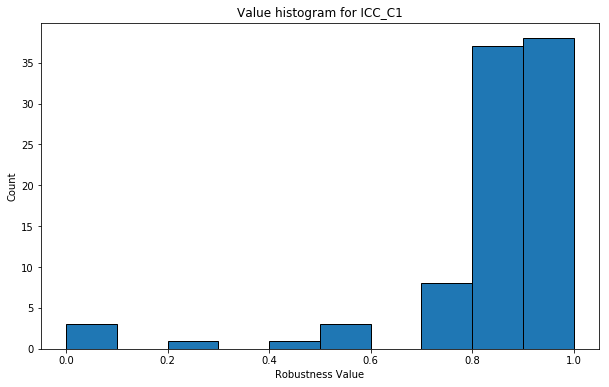

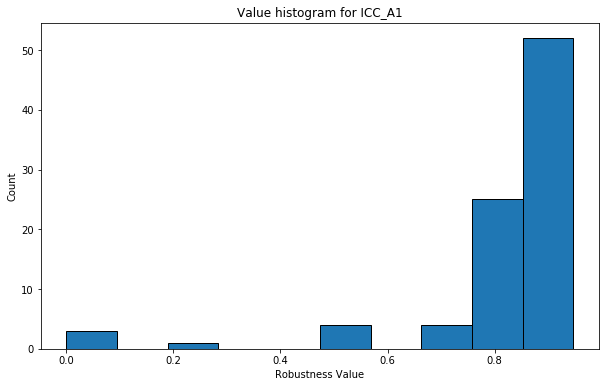

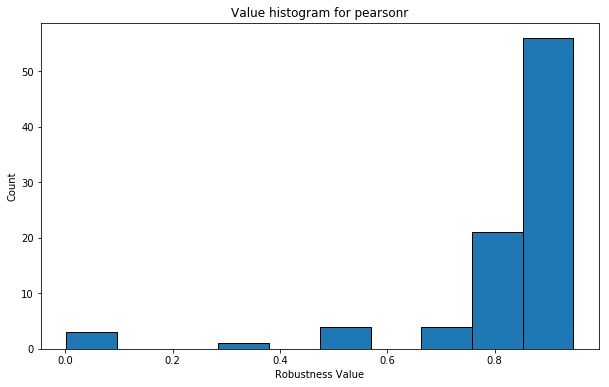

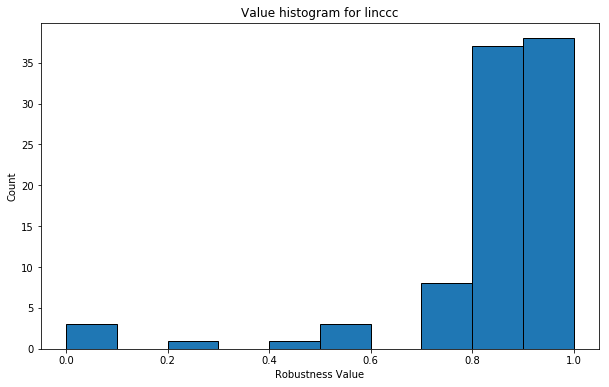

In [14]:
for r_name in robustness_names:
    # collect values
    values = []
    for f_name in feature_dic:
        v = feature_dic[f_name][r_name]
        if not math.isnan(v):
            values.append(v)
        
    plt.figure(figsize=(10, 6))
    plt.title("Value histogram for {}".format(r_name))
    plt.xlabel("Robustness Value")
    plt.ylabel("Count")
    plt.hist(values, edgecolor='black')